# **Prédiction des tarifs de taxi à New York**



## **Avant-propos**

Le projet consiste à faire une prédiction des tarifs de taxi à New York que nous soumettrons à Kaggle pour avoir un score. 
Nous disposons à cet effet de deux sources de données. La première est l'ensemble d'apprentissage qui contient le coût du trajet en taxi, c'est-à-dire la variable à prédire. C'est sur cet ensemble que nous allons entraîner nos différents modèles.
La seconde source de données est l'ensemble de test. Cet ensemble ne contient pas la variable cible (le coût du trajet). C'est les observations contenues dans cet ensemble que nous allons prédire et soumettre. 

Vous retrouverez ce projet sur le lien suivant : [Prédiction des tarifs de taxi à New York](https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/data)

## **Description des datasets**
 
L'ensemble d'apprentissage "**train.csv**" comporte 8 variables.
Nous avons notamment 5 variables de type float, 1 variable de type integer et 2 variables de type string.

#### **La variable cible** 
* **fare_amount** : le coût du tarif en taxi (en dollars) de type float.

#### **Les autres variables**
* **pickup_datetime** : quand le trajet en taxi a commencé de type string ;
* **pickup_longitude** : les coordonnées de longitude quand le trajet en taxi a commencé de type float ;
* **pickup_latitude** : les coordonnées de latitude quand le trajet en taxi a commencé de type float ;
* **pickup_longitude** : les coordonnées de longitude quand le trajet en taxi s'est terminé de type float ;
* **pickup_latitude** : les coordonnées de latitude quand le trajet en taxi s'est terminé de type float ;
* **passenger_count** : le nombre de passagers dans le taxi de type integer.

#### **Identifiant unique**
* **key** : de type string, key est composé de pickup_datetime et d'un entier permet d'identifier chaque ligne du dataset de façon unique.

L'ensemble de test "**test.csv**" comporte 7 variables. 
Nous retrouvons les mêmes variables que celles dans l'ensemble d'apprentissage sauf la variable *fare_amount*.

## Les bibliothèques 
Nous avons utilisé dans ce projet différentes bibliothèques que voici :

* **numpy** : module de calcul scientifique, elle sert à réaliser les opérations mathématiques et statistiques en Python ;
* **pandas** : module d'analyse et de manipulation de données en Python, elle est utile pour charger ou fusionner les données ;
* **seaborn** : module de datavisualisation en Python, elle permet de créer des graphiques statistiques ;
* **matplotlib** : utilisée également pour la visualisation de données sur Python, elle permet de créer des graphiques ;
* **datetime** : module permettant de manipuler les dates et les heures ;
* **scikit-learn (sklearn)** : destinée à l'apprentissage automatique, elle donne accès à de nombreux modèles ; 
* **warnings** : utile pour contrôler les alertes.

In [184]:
import pandas as pd # Importation de la librairie Pandas
import numpy as np # Importation de la librairie Numpy
import datetime as dt # Importation de la librairie datetime
import matplotlib.pyplot as plt # Importation du module pyplot de matplotlib
import seaborn as sns # Importation de la librairie seaborn

## Chargement des données 
Dans cette partie, nous allons importer nos données et les stocker dans un dataframe.
Nous allons utiliser la librairie **Pandas** pour cette tâche. 

Mais avant de passer au chargement de données, nous allons prédéfinir nos types de données.
Ceci aura pour but d'éviter à Pandas d'avoir à déduire par lui-même le type des données. 
Ainsi, nous évitons une utilisation inutile de la mémoire.

#### **Définition d'un chemin absolu vers les fichiers à importer**

Nous spécifions tout d'abord le chemin vers le répertoire dans lequel se trouve nos fichiers. 

In [185]:
trainPath = "trainDDF.csv"
testPath = "testDDF.csv"

#### **Définition du type des variables** 

In [186]:
typeVar = {
    "key": "object",
    "fare_amount": "float32",
    "pickup_datetime": "object",
    "pickup_longitude": "float64",
    "pickup_latitude": "float64",
    "dropoff_longitude": "float64",
    "dropoff_latitude": "float64",
    "passenger_count": "int8"
}

In [187]:
%%time 
# %%time permet d'avoir le temps d'exécution

# Importation de l'ensemble d'apprentissage 
dfTrain = pd.read_csv(trainPath, nrows = 150000, dtype = typeVar) 
# nrows permet de limiter le nombre de lignes à lire. 
# Ici, nous avons choisi d'importer dans notre dataframe 150000 lignes du set d'apprentissage.
# Ce choix car le set d'apprentissage contient des millions de ligne.

# Importation de l'ensemble de test
dfTest = pd.read_csv(testPath, dtype = typeVar)

print("Taille de l'ensemble de données d'apprentissage", dfTrain.shape)
print("Taille de l'ensemble de données de test", dfTest.shape)
print()
print("Description de l'ensemble d'apprentissage")
dfTrain.info()
print()
print("Temps d'exécution")

Taille de l'ensemble de données d'apprentissage (150000, 8)
Taille de l'ensemble de données de test (9914, 7)

Description de l'ensemble d'apprentissage
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                150000 non-null  object 
 1   fare_amount        150000 non-null  float32
 2   pickup_datetime    150000 non-null  object 
 3   pickup_longitude   150000 non-null  float64
 4   pickup_latitude    150000 non-null  float64
 5   dropoff_longitude  149999 non-null  float64
 6   dropoff_latitude   149999 non-null  float64
 7   passenger_count    150000 non-null  int8   
dtypes: float32(1), float64(4), int8(1), object(2)
memory usage: 7.6+ MB

Temps d'exécution
CPU times: total: 234 ms
Wall time: 233 ms


In [189]:
# Aperçu de l'ensemble d'apprentissage
dfTrain.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


## Traitement et nettoyage des données 

Dans cette partie, nous allons faire un nettoyage nos ensembles de données.
Nous allons relever les données manquantes et les données aberrantes et de les traiter.
Cette étape est nécessaire avant de passer à la modélisation car plus nos données seront de bonne qualité plus nos prédictions seront précises.

In [190]:
# Nous commençons avec quelques statistiques sur notre ensemble d'apprentissage
dfTrain.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,150000.000000,150000.000000,150000.000000,149999.000000,149999.000000,150000.000000
mean,11.362020,-72.500714,39.921610,-72.507088,39.928809,1.680407
std,9.871362,10.586363,6.131464,10.406313,6.110042,1.305797
min,-44.900002,-736.550000,-74.007670,-84.654241,-74.015160,0.000000
25%,6.000000,-73.992028,40.734955,-73.991258,40.734126,1.000000
50%,8.500000,-73.981732,40.752720,-73.980042,40.753243,1.000000
75%,12.500000,-73.966989,40.767145,-73.963473,40.768088,2.000000
max,500.000000,40.787575,401.083332,40.851027,404.616667,6.000000


A partir de ces statistiques, nous voyons que : 
* la variable fare_amount qui correspond au coût du trajet en taxi a des valeurs négatives. Elle a un minimum d'environ -44.5 dollars, ce qui n'est normalement pas possible. En effet, les taxis new yorkais ont un tarif forfaitaire de 2.5 dollars [TarifTaxiNewYork](https://newyorkmonamour.fr/taxi-new-york/) ;
* les variables pickup_longitude et dropoff_longitude ont des valeurs maximales autour de 40 alors que les longitudes à New York sont normalement entre -75 et -72. Nous avons aussi des valeurs de -736 comme minimum pour pickup_longitude et de -84 pour dropoff_longitude, ce qui est anormal ;
* les variables pickup_latitude et dropoff_latitude ont des valeurs minimales de -74 or, les latitudes à New York se situent entre 40 et 42. Nous avons aussi des valeurs maximales pour ces deux variables à 401, ce qui ne réflète pas une latitude de la ville de New York ;
* le nombre minimum de passagers dans un taxi est de 0, ce qui n'est pas normal car le trajet en taxi doit comporter au moins 1 personne selon notre problématique ;
* nous n'avons pratiquement que 2 données manquantes, car toutes les variables ont 150000 observations à l'exception de dropoff_longitude et dropoff_latitude.

Nous allons donc procéder au traitement de ces données aberrantes que nous avons détectées.

#### **Copie des dataframes**
Avant de passer au traitement de nos ensembles de données, nous allons faire des copies. Cela nous permet de faire une comparaison avec notre ensemble de données initial après les traitements.

In [191]:
# Création d'une copie des ensembles de données 
trainDF = dfTrain.copy()
testDF = dfTest.copy()

# Aperçu 
trainDF.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


#### **Données manquantes**
Nous allons à présent chercher les valeurs manquantes de notre dataset.

In [192]:
trainDF.loc[(trainDF["dropoff_longitude"].isnull() == True)]

# Nous avons deux valeurs manquantes qui correspondent à une même observation : l'une 
# au niveau de la variable dropoff_longitude et l'autre au niveau de la variable dropoff_latitude.
# Il s'agit de données que nous ne pouvons pas de deviner et qui sont négligeables par rapport 
# au reste des observations.

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
120227,2012-12-11 12:57:00.00000013,12.5,2012-12-11 12:57:00 UTC,-73.99276,40.743098,NaN,NaN,0


In [193]:
# Nous allons supprimer les deux valeurs manquantes trouvées.
trainDF = trainDF.dropna()
trainDF.loc[(trainDF["dropoff_longitude"].isnull() == True)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


#### **Données aberrantes**

Nous allons à présent nous intéresser aux données aberrantes de nos ensembles de données.
Il s'agit dans notre cas de données qui sont incohérentes vis-à-vis de notre problématique. Par exemple avoir des valeurs négatives pour le tarif du tarif.
Nous allons procéder par variable.

#### **passenger_count** *

Nous commençons avec la variable passenger_count qui indique le nombre de passagers.
A priori, nous ne sommes pas censés avoir 0 passager durant un trajet. 
Par contre, nous pouvons avoir au-delà de 4 passagers car nous n'avons pas eu de précision sur le type de taxi. Il peut donc y avoir des taxis vans qui peuvent contenir jusqu'à 6 passagers.

In [194]:
# Déterminons la fréquence d'apparition des différentes modalités de passenger_count

trainDF['passenger_count'].value_counts()

1    104044
2     21992
5     10646
3      6499
4      3145
6      3121
0       552
Name: passenger_count, dtype: int64

Nous voyons que la modalité 0 apparaît 552 fois sur les 150000 observations de l'ensemble d'apprentissage. Ce qui est assez négligeable. 

Nous choisissons alors de supprimer les données correspondant à cette modalité. 

In [195]:
# Suppression des lignes correspondant à la modalité 0 dans passenger_count
trainDF = trainDF.loc[trainDF['passenger_count'] != 0]

# Nous nous assurons que nos traitements ont été appliqués
trainDF['passenger_count'].value_counts()

1    104044
2     21992
5     10646
3      6499
4      3145
6      3121
Name: passenger_count, dtype: int64

#### **pickup_longitude et dropoff_longitude** 

Nous allons à présent nous intéresser aux variables pickup_longitude et dropoff_longitude qui correspondent aux coordonnées de longitude respectivement de départ et d'arrivée du taxi.

Les longitudes à New York se situent entre -74 et -72 en décimal.
Nous allons donc exclure toute longitude au-delà de l'intervalle ]-75, -72[.

Nous avons choisi ce type de traitement pour ces données car nous avons jugé que ces longitudes ne concernent pas New York et nous n'avons aucun moyen de les corriger.

In [196]:
((trainDF['pickup_longitude'] >= -72) | (trainDF['pickup_longitude'] <= -75) | (trainDF['dropoff_longitude'] >= -72) | (trainDF['dropoff_longitude'] <= -75)).value_counts()

# Nous avons 3084 observations de notre ensemble d'apprentissage qui sont au-delà de notre intervalle. 
# Nous allons donc les supprimer.

False    146363
True       3084
dtype: int64

In [197]:
trainDF[((trainDF['pickup_longitude'] >= -72) | (trainDF['pickup_longitude'] <= -75) | (trainDF['dropoff_longitude'] >= -72) | (trainDF['dropoff_longitude'] <= -75))]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
11,2012-12-24 11:24:00.00000098,5.5,2012-12-24 11:24:00 UTC,0.0,0.0,0.0,0.0,3
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00 UTC,0.0,0.0,0.0,0.0,1
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00 UTC,0.0,0.0,0.0,0.0,1
124,2013-01-17 17:22:00.00000043,8.0,2013-01-17 17:22:00 UTC,0.0,0.0,0.0,0.0,2
192,2010-09-05 17:08:00.00000092,3.7,2010-09-05 17:08:00 UTC,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...
149650,2014-06-14 23:01:50.0000002,6.5,2014-06-14 23:01:50 UTC,0.0,0.0,0.0,0.0,1
149682,2010-06-29 00:13:04.0000002,6.5,2010-06-29 00:13:04 UTC,0.0,0.0,0.0,0.0,2
149702,2013-09-14 20:02:00.000000270,6.5,2013-09-14 20:02:00 UTC,0.0,0.0,0.0,0.0,1
149769,2012-05-06 11:08:00.000000115,240.0,2012-05-06 11:08:00 UTC,0.0,0.0,0.0,0.0,1


In [198]:
# Nous avons des colonnes interchangées, nous allons les corriger
# Nous allons créer une colonne result qui prend la valeur True si les colonnes sont interchangées et False sinon 
trainDF = trainDF.assign(result = (trainDF.pickup_latitude < trainDF.pickup_longitude) | (trainDF.dropoff_latitude < trainDF.dropoff_longitude))
trainDF[trainDF['result'] == True]

# Nous avons 68 lignes

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,result
2147,2013-05-24 14:54:00.00000079,5.0,2013-05-24 14:54:00 UTC,40.751582,-73.986968,40.758867,-73.978353,2,True
3827,2013-06-20 04:28:00.0000001,11.0,2013-06-20 04:28:00 UTC,40.719830,-73.988467,40.723305,-73.939430,1,True
4783,2013-05-22 06:28:00.0000004,6.5,2013-05-22 06:28:00 UTC,40.748262,-73.991840,40.740372,-73.979010,1,True
6705,2013-05-22 15:33:00.000000175,13.0,2013-05-22 15:33:00 UTC,40.766125,-73.983285,40.757417,-73.977962,2,True
7525,2013-05-22 10:54:00.000000140,13.0,2013-05-22 10:54:00 UTC,40.760495,-73.973047,40.740367,-73.994392,1,True
...,...,...,...,...,...,...,...,...,...
136650,2013-05-23 21:04:00.000000183,7.0,2013-05-23 21:04:00 UTC,40.757212,-73.975972,40.750352,-73.991078,3,True
138450,2013-05-26 12:43:00.00000031,24.0,2013-05-26 12:43:00 UTC,40.719985,-73.961102,40.768477,-73.861920,3,True
140596,2013-05-23 08:22:00.000000148,12.5,2013-05-23 08:22:00 UTC,40.762180,-73.959952,40.765092,-73.980260,1,True
144094,2013-05-23 06:47:00.00000025,52.0,2013-05-23 06:47:00 UTC,40.645115,-73.777107,40.715812,-74.015160,1,True


In [199]:
# Nous allons créer une variable interchange qui va nous servir de condition pour interchanger les colonnes
interchange = (trainDF['result'] == True)
trainDF.loc[interchange,['pickup_longitude','pickup_latitude']] = trainDF.loc[interchange,['pickup_latitude','pickup_longitude']].values
trainDF.loc[interchange,['dropoff_longitude','dropoff_latitude']] = trainDF.loc[interchange,['dropoff_latitude','dropoff_longitude']].values
trainDF.drop('result', axis = 1, inplace = True)

In [200]:
((trainDF['pickup_longitude'] >= -72) | (trainDF['pickup_longitude'] <= -75) | (trainDF['dropoff_longitude'] >= -72) | (trainDF['dropoff_longitude'] <= -75)).value_counts()

False    146425
True       3022
dtype: int64

In [201]:
trainDF.drop(trainDF[(trainDF['pickup_longitude'] >= -72) | (trainDF['pickup_longitude'] <= -75)].index, inplace=True)
trainDF.drop(trainDF[(trainDF['dropoff_longitude'] >= -72) | (trainDF['dropoff_longitude'] <= -75)].index, inplace=True)

# Nous vérifions que le traitement a bien été appliqué
trainDF.shape

(146425, 8)

#### **pickup_latitude et dropoff_latitude** 

Nous allons faire la même chose avec les variables pickup_latitude et dropoff_latitude qui correspondent aux coordonnées de latitude respectivement de départ et d'arrivée du taxi.

Les latitudes à New York se situent entre 40 et 42 en décimal.
Nous allons donc exclure toute longitude au-delà de l'intervalle [40, 42[.

Nous avons choisi ce type de traitement pour ces données car nous avons jugé que ces latitudes ne concernent pas New York et nous n'avons aucun moyen de les corriger.

In [202]:
((trainDF['pickup_latitude'] >= 42) | (trainDF['pickup_latitude'] < 40) | (trainDF['dropoff_latitude'] >= 42) | (trainDF['dropoff_latitude'] < 40)).value_counts()

# Nous avons 32 observations de notre ensemble d'apprentissage qui sont au-delà de l'intervalle.
# NOus allons les supprimer.

False    146393
True         32
dtype: int64

In [203]:
trainDF.drop(trainDF[(trainDF['pickup_latitude'] >= 42) | (trainDF['pickup_latitude'] < 40)].index, inplace=True)
trainDF.drop(trainDF[(trainDF['dropoff_latitude'] >= 42) | (trainDF['dropoff_latitude'] < 40)].index, inplace=True)

trainDF.shape

(146393, 8)

In [204]:
# Nous allons vérifier si nous avons des coordonnées de départ égales aux coordonnées d'arrivée.
# C'est-à-dire si nous avons les mêmes coordonnées de longitude et de latitude au départ du taxi 
# ainsi qu'à son arrivée. 
# Si c'est le cas, il faudra supprimer ces observations car cela signifierait que le taxi n'a pas bougé.
# Ce qui n'est pas du tout logique.
((trainDF['pickup_latitude'] == trainDF['dropoff_latitude']) & (trainDF['pickup_longitude'] == trainDF['dropoff_longitude'])).value_counts()

# Nous remarquons qu'il y a 1579 observations de notre ensemble d'apprentissage concernées.
# Nous allons les supprimer.

False    144814
True       1579
dtype: int64

In [205]:
trainDF[(trainDF['pickup_latitude'] == trainDF['dropoff_latitude']) & (trainDF['pickup_longitude'] == trainDF['dropoff_longitude'])]
# Nous voyons que c'est des trajets qui ont des tarifs différents de 0.
# Il se pourrait donc que les taxis soient revenus au même point de départ.
# Sur la base de cette hypothèse, nous allons créer une variable qui prend la valeur 1
# si le taxi dont les coordonnées de départ et d'arrivée sont égales a un tarif supérieur à 0.
# Cette variable a pour but d'indiquer que le taxi est revenu au même point de départ.

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
105,2009-03-25 00:08:52.0000001,52.00,2009-03-25 00:08:52 UTC,-74.035839,40.747320,-74.035839,40.747320,1
191,2014-01-08 21:55:58.0000006,6.50,2014-01-08 21:55:58 UTC,-73.998488,40.726303,-73.998488,40.726303,1
270,2012-08-25 01:53:42.0000005,7.50,2012-08-25 01:53:42 UTC,-73.995892,40.746454,-73.995892,40.746454,1
290,2009-12-14 12:33:00.00000075,6.90,2009-12-14 12:33:00 UTC,-73.982432,40.745747,-73.982432,40.745747,1
396,2014-03-12 18:12:44.0000006,12.00,2014-03-12 18:12:44 UTC,-73.844904,40.736318,-73.844904,40.736318,1
...,...,...,...,...,...,...,...,...
149558,2013-05-06 19:31:00.00000072,4.50,2013-05-06 19:31:00 UTC,-73.989437,40.726332,-73.989437,40.726332,5
149767,2011-12-03 01:22:00.00000068,5.70,2011-12-03 01:22:00 UTC,-73.979623,40.687132,-73.979623,40.687132,6
149809,2013-03-12 20:47:01.0000002,58.25,2013-03-12 20:47:01 UTC,-74.034735,40.747095,-74.034735,40.747095,1
149934,2011-07-28 22:34:00.000000169,20.10,2011-07-28 22:34:00 UTC,-73.813828,40.728915,-73.813828,40.728915,4


In [206]:
# Suppression de ces observations
#trainDF.drop(trainDF[(trainDF['pickup_latitude'] == trainDF['dropoff_latitude']) & (trainDF['pickup_longitude'] == trainDF['dropoff_longitude'])].index, inplace=True)

# Nous vérifions que le traitement a bien été appliqué
#trainDF.shape

#### **fare_amount**

Pour finir avec le traitement des données aberrantes, nous allons nous intéresser à la variable fare_amount.
Comme nous l'avons déjà évoqué, nous ne sommes pas censés avoir des tarifs inférieurs au tarif forfaitaire de base (2,5 dollars) dans notre dataset.
Toute observation ne respectant pas ce critère sera supprimée.

In [207]:
occur = (trainDF['fare_amount'] < 2.5).value_counts()
print(occur)
# Nous avons 14 observations dont le tarif forfaitaire de base est inférieur à 2,5$. 

False    146379
True         14
Name: fare_amount, dtype: int64


In [208]:
# Suppression des observations concernées
trainDF.drop(trainDF[(trainDF['fare_amount'] < 2.5)].index, inplace=True)

# Vérification
trainDF[trainDF['fare_amount'] < 2.5]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


#### **Création de nouvelles variables**

Après l'épuration de nos ensembles de données, nous allons passer à la création de nouvelles variables.
Il s'agit de variables que nous avons trouvé utiles à intégrer dans notre modèle : la distance et les variables de temps.

Les variables de temps seront créés à partir de la variable pickup_datetime. Elles sont importantes car le tarif forfaitaire de base des taxis évolue en fonction des tranches horaires. Ainsi, entre 16h-20h (heure de pointe), le tarif forfaitaire connaît une augmentation d'1 dollar alors qu'entre 20h-06h, nous avons une augmentation de 0,5 dollars. [TarifTaxiNewYork](https://newyorkmonamour.fr/taxi-new-york/)

De même le tarif augmente avec la distance parcourue par le taxi. Nous créerons donc une variable distance à partir des coordonnées de longitude et de latitude.

#### **Création des variables de temps**
Nous allons d'abord convertir la variable pickup_datetime (actuellement de type string) en variable de type temps. 

In [209]:
trainDF['pickup_datetime'] = pd.to_datetime(trainDF.pickup_datetime)

# Nous faisons la même chose sur l'ensemble de test 
testDF['pickup_datetime'] = pd.to_datetime(testDF.pickup_datetime)

# Nous vérifions
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146379 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                146379 non-null  object             
 1   fare_amount        146379 non-null  float32            
 2   pickup_datetime    146379 non-null  datetime64[ns, UTC]
 3   pickup_longitude   146379 non-null  float64            
 4   pickup_latitude    146379 non-null  float64            
 5   dropoff_longitude  146379 non-null  float64            
 6   dropoff_latitude   146379 non-null  float64            
 7   passenger_count    146379 non-null  int8               
dtypes: datetime64[ns, UTC](1), float32(1), float64(4), int8(1), object(1)
memory usage: 8.5+ MB


In [210]:
# Création des variables temps 

## Jour
trainDF['pickup_dateJour'] = trainDF['pickup_datetime'].dt.day
testDF['pickup_dateJour'] = testDF['pickup_datetime'].dt.day

## Heure 
trainDF['pickup_heure'] = trainDF['pickup_datetime'].dt.hour
testDF['pickup_heure'] = testDF['pickup_datetime'].dt.hour

## Jour de la semaine
trainDF['pickup_jour'] = trainDF['pickup_datetime'].dt.weekday
testDF['pickup_jour'] = testDF['pickup_datetime'].dt.weekday

## Mois
trainDF['pickup_mois'] = trainDF['pickup_datetime'].dt.month
testDF['pickup_mois'] = testDF['pickup_datetime'].dt.month

## Année
trainDF['pickup_annee'] = trainDF['pickup_datetime'].dt.year
testDF['pickup_annee'] = testDF['pickup_datetime'].dt.year

# Aperçu de l'ensemble d'apprentissage avec les nouvelles variables créées
trainDF.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_dateJour,pickup_heure,pickup_jour,pickup_mois,pickup_annee
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,17,0,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,16,1,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,3,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,5,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,1,3,2010


In [211]:
# Nous allons chercher les observations dont le trajet se déroule entre 16h-20h 
# qui ont un tarif inférieur à 3,5$  
trainDF.loc[((trainDF['pickup_heure'] >= 16) & (trainDF['pickup_heure'] <= 20)) & (trainDF['fare_amount'] < 3.5)]

# Nous avons trouvé 617 observations concernées.

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_dateJour,pickup_heure,pickup_jour,pickup_mois,pickup_annee
630,2009-01-10 16:28:00.00000086,2.9,2009-01-10 16:28:00+00:00,-73.977417,40.757653,-73.974607,40.756757,1,10,16,5,1,2009
782,2014-08-25 20:37:22.0000001,3.0,2014-08-25 20:37:22+00:00,-74.007472,40.740880,-74.008959,40.738234,1,25,20,0,8,2014
1406,2013-08-06 18:03:59.0000005,3.0,2013-08-06 18:03:59+00:00,-73.982204,40.736180,-73.985603,40.735148,1,6,18,1,8,2013
1564,2010-04-09 19:17:21.0000006,3.3,2010-04-09 19:17:21+00:00,-73.963262,40.766141,-73.959067,40.771833,2,9,19,4,4,2010
1684,2009-05-02 19:01:01.0000002,2.5,2009-05-02 19:01:01+00:00,-73.137393,41.366138,-73.996510,40.745320,2,2,19,5,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149049,2010-01-19 17:50:00.000000212,3.3,2010-01-19 17:50:00+00:00,-73.983420,40.756320,-73.981177,40.760307,1,19,17,1,1,2010
149216,2013-09-06 16:51:00.00000032,3.0,2013-09-06 16:51:00+00:00,-73.985880,40.726912,-73.987585,40.727810,6,6,16,4,9,2013
149261,2010-02-12 17:26:00.00000040,3.3,2010-02-12 17:26:00+00:00,-73.971540,40.794970,-73.974728,40.793120,1,12,17,4,2,2010
149401,2010-04-14 16:02:32.0000001,2.9,2010-04-14 16:02:32+00:00,-73.953977,40.789891,-73.955582,40.788221,2,14,16,2,4,2010


In [212]:
# Suppression des observations concernées
trainDF.drop(trainDF.loc[((trainDF['pickup_heure'] >= 16) & (trainDF['pickup_heure'] <= 20)) & (trainDF['fare_amount'] < 3.5)].index,
             inplace=True)

# Vérification 
trainDF.loc[((trainDF['pickup_heure'] >= 16) & (trainDF['pickup_heure'] <= 20)) & (trainDF['fare_amount'] < 3.5)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_dateJour,pickup_heure,pickup_jour,pickup_mois,pickup_annee


In [213]:
# Nous allons chercher les observations dont le trajet se déroule entre 20h-06h 
# qui ont un tarif inférieur à 3$  
trainDF.loc[((trainDF['pickup_heure'] > 20) & (trainDF['pickup_heure'] <= 6)) & (trainDF['fare_amount'] < 3)]

# Nous n'avons aucune observation concernée.

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_dateJour,pickup_heure,pickup_jour,pickup_mois,pickup_annee


In [167]:
# Téléchargement du dataframe pour calculer la distance
#trainDF.to_csv('trainDF.csv',index=False)

In [168]:
# Split du dataframe
#path1 = "/kaggle/working/trainDF.csv"
#trainDF1 = pd.read_csv(path1, nrows = 50000, dtype = typeVar) 
#trainDF1.to_csv('trainDF1.csv',index=False)

In [169]:
#trainDF2 = pd.read_csv(path1, nrows = 50000, skiprows = lambda x : x > 0 and x <= 50000, dtype = typeVar) 
#trainDF2.to_csv('trainDF2.csv',index=False)

In [170]:
#trainDF3 = pd.read_csv(path1, skiprows = lambda x : x > 0 and x <= 100000, dtype = typeVar) 
#trainDF3.to_csv('trainDF3.csv',index=False)

#### **Création de la variable distance** 

Nous allons créer la variable distance en utilisant la formule de haversine [FormuleDeHaverSine](http://villemin.gerard.free.fr/aGeograp/Distance.htm)   
Cette formule permet de calculer la distance entre deux points d'une sphère (ici, il s'agit du point de départ du taxi et de son point d'arrivée). 

In [214]:
typeVar = {
    "key": "object",
    "fare_amount": "float32",
    "pickup_datetime": "object",
    "pickup_longitude": "float64",
    "pickup_latitude": "float64",
    "dropoff_longitude": "float64",
    "dropoff_latitude": "float64",
    "passenger_count": "int8",
    "distance": "object"
}

In [215]:
trainDF = pd.read_csv('trainDF.csv',  dtype = typeVar) 
testDF = pd.read_csv('testDF.csv',  dtype = typeVar) 

In [216]:
# Train 
trainDF.loc[(trainDF["distance"].isnull() == True)]
trainDF = trainDF.dropna()

In [217]:
# 
trainDF['distance'].str[-2:].unique()

array(['.9', '.3', '.4', '.2', '.8', '.5', '.6', '.7', '.0', '.1', 'ft',
       'mi'], dtype=object)

In [218]:
for i, row in trainDF.iterrows():
    if 'mi' in row['distance']:
        trainDF.at[i, 'distance'] = trainDF.at[i, 'distance'].replace(" mi", "")
        trainDF.at[i, 'distance'] = pd.to_numeric(trainDF.at[i, 'distance'])
    elif 'ft' in row['distance']:
        trainDF.at[i, 'distance'] = trainDF.at[i, 'distance'].replace(" ft", "")
        trainDF.at[i, 'distance'] = pd.to_numeric(trainDF.at[i, 'distance'])*0.0001893939
    else:
        trainDF.at[i, 'distance'] = pd.to_numeric(trainDF.at[i, 'distance'])

trainDF['distance'] = trainDF['distance'].astype('float')
trainDF.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_dateJour,pickup_heure,pickup_jour,pickup_mois,pickup_annee,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,17,0,6,2009,0.9
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,16,1,1,2010,6.3
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,3,8,2011,0.9
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,5,4,2012,2.4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,1,3,2010,1.2


In [219]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145748 entries, 0 to 145761
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                145748 non-null  object 
 1   fare_amount        145748 non-null  float32
 2   pickup_datetime    145748 non-null  object 
 3   pickup_longitude   145748 non-null  float64
 4   pickup_latitude    145748 non-null  float64
 5   dropoff_longitude  145748 non-null  float64
 6   dropoff_latitude   145748 non-null  float64
 7   passenger_count    145748 non-null  int8   
 8   pickup_dateJour    145748 non-null  int64  
 9   pickup_heure       145748 non-null  int64  
 10  pickup_jour        145748 non-null  int64  
 11  pickup_mois        145748 non-null  int64  
 12  pickup_annee       145748 non-null  int64  
 13  distance           145748 non-null  float64
dtypes: float32(1), float64(5), int64(5), int8(1), object(2)
memory usage: 19.2+ MB


In [220]:
# Test
testDF['distance'].str[-2:].unique()

array(['mi', 'ft'], dtype=object)

In [221]:
# Tests 
for i, row in testDF.iterrows():
    if 'mi' in row['distance']:
        testDF.at[i, 'distance'] = testDF.at[i, 'distance'].replace(" mi", "")
        testDF.at[i, 'distance'] = pd.to_numeric(testDF.at[i, 'distance'])
    elif 'ft' in row['distance']:
        testDF.at[i, 'distance'] = testDF.at[i, 'distance'].replace(" ft", "")
        testDF.at[i, 'distance'] = pd.to_numeric(testDF.at[i, 'distance'])*0.0001893939
    else:
        testDF.at[i, 'distance'] = pd.to_numeric(testDF.at[i, 'distance'])

testDF['distance'] = testDF['distance'].astype('float')
testDF.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,1.7
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2.1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.5
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,1.5
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,3.9


In [222]:
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int8   
 7   distance           9914 non-null   float64
dtypes: float64(5), int8(1), object(2)
memory usage: 552.0+ KB


In [59]:
# Création de la variable distance (en km)

## Nous allons créer une fonction qui calcule la distance de Haversine
## Cette fonction prend en entrée des longitudes et des latitudes en degrés

#def distanceDeHaversine(latitude1, longitude1, latitude2, longitude2):
#    latitude1, longitude1, latitude2, longitude2 = map(np.radians, (latitude1, 
#                                                                    longitude1, 
#                                                                    latitude2, 
#                                                                    longitude2))
#    # Nous convertissons les latitudes et longitudes qui sont en degrés en radians.
#    rayonTerre = 6371  # il s'agit du rayon moyen de la terre en km
#    
#    # Nous déterminons l'écart entre nos latitudes et nos longitudes
#    latitude = latitude2 - latitude1
#    longitude = longitude2 - longitude1
#    
#    # Nous calculons la distance de haversine 
#    d = np.sin(latitude * 0.5) ** 2 + np.cos(latitude1) * np.cos(latitude2) * np.sin(longitude * 0.5) ** 2
#    dist = 2 * rayonTerre * np.arcsin(np.sqrt(d))
#    return dist
#
#trainDF['distance'] = distanceDeHaversine(trainDF['pickup_latitude'].values, 
#                                         trainDF['pickup_longitude'].values, 
#                                         trainDF['dropoff_latitude'].values, 
#                                         trainDF['dropoff_longitude'].values)
#
#testDF['distance'] = distanceDeHaversine(testDF['pickup_latitude'].values, 
#                                        testDF['pickup_longitude'].values, 
#                                        testDF['dropoff_latitude'].values, 
#                                        testDF['dropoff_longitude'].values)

In [223]:
# Suppression des observations où le samedi et le dimanche ont un tarif inférieur à 3$
trainDF.drop(trainDF.loc[((trainDF['pickup_jour'] == 5) | (trainDF['pickup_jour'] == 6)) & (trainDF['fare_amount'] < 3)].index,
             inplace=True)

In [224]:
# Suppression des valeurs non conformes (tarif normal supérieur à 2.5*distance)
trainDF = trainDF[trainDF['fare_amount'] >= 2.51*trainDF['distance']]

In [225]:
# Création de variables heure de pointe et heure de nuit
trainDF['heureDeNuitEtDePointe'] = np.where((trainDF['pickup_heure'] >= 16) & (trainDF['pickup_heure'] < 20), 2,
                                          np.where((trainDF['pickup_heure'] >= 20) | (trainDF['pickup_heure'] <= 6), 1, 0))

# Création d'une variable week_end
trainDF['pickup_weekEnd'] = np.where((trainDF['pickup_jour'] == 5) | (trainDF['pickup_jour'] == 6), 1,0)


In [226]:
# Création d'une variable type de saison
trainDF['pickup_saison'] = np.where((((trainDF['pickup_dateJour'] >= 21) & (trainDF['pickup_mois'] == 12)) | (trainDF['pickup_mois'].isin([1,2])) | ((trainDF['pickup_dateJour'] < 20) & (trainDF['pickup_mois'] == 3))), 1,
                           np.where((((trainDF['pickup_dateJour'] >= 20) & (trainDF['pickup_mois'] == 3)) | (trainDF['pickup_mois'].isin([4,5])) | ((trainDF['pickup_dateJour'] < 21) & (trainDF['pickup_mois'] == 6))), 2,
                           np.where((((trainDF['pickup_dateJour'] >= 21) & (trainDF['pickup_mois'] == 6)) | (trainDF['pickup_mois'].isin([7,8])) | ((trainDF['pickup_dateJour'] < 22) & (trainDF['pickup_mois'] == 9))), 3, 4)))

In [227]:
# Les trajets passant par l'aéroport de JFK
trainDF[(((trainDF['pickup_latitude'] >= 40.64) & (trainDF['pickup_latitude'] <= 40.65)) & ((trainDF['pickup_longitude'] >= -73.79) & (trainDF['pickup_longitude'] <= -73.77)) | ((trainDF['dropoff_latitude'] >= 40.64) & (trainDF['dropoff_latitude'] <= 40.65)) & ((trainDF['dropoff_longitude'] >= -73.79) & (trainDF['dropoff_longitude'] <= -73.77)))].head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_dateJour,pickup_heure,pickup_jour,pickup_mois,pickup_annee,distance,heureDeNuitEtDePointe,pickup_weekEnd,pickup_saison
101,2014-10-19 09:51:53.0000001,57.330002,2014-10-19 09:51:53+00:00,-73.776721,40.645324,-73.983183,40.748877,2,19,9,6,10,2014,17.4,0,1,4
102,2011-11-03 23:07:00.000000128,49.799999,2011-11-03 23:07:00+00:00,-73.785550,40.642050,-73.980793,40.749187,1,3,23,3,11,2011,17.0,1,0,4
163,2015-02-06 14:44:35.0000003,23.000000,2015-02-06 14:44:35+00:00,-73.787010,40.644138,-73.810638,40.692219,2,6,14,4,2,2015,5.3,0,0,1
181,2009-04-10 16:05:00.000000135,49.150002,2009-04-10 16:05:00+00:00,-73.789652,40.643633,-73.987165,40.768555,1,10,16,4,4,2009,19.3,2,0,2
245,2009-12-08 06:24:00.00000043,49.570000,2009-12-08 06:24:00+00:00,-73.776713,40.645447,-73.980527,40.770763,1,8,6,1,12,2009,19.5,1,0,4


In [228]:
# Les trajets passant par l'aéroport de Laguardia 
trainDF[(((trainDF['pickup_latitude'] >= 40.766) & (trainDF['pickup_latitude'] <= 40.775)) & ((trainDF['pickup_longitude'] >= -73.879) & (trainDF['pickup_longitude'] <= -73.86)) | ((trainDF['dropoff_latitude'] >= 40.766) & (trainDF['dropoff_latitude'] <= 40.775)) & ((trainDF['dropoff_longitude'] >= -73.879) & (trainDF['dropoff_longitude'] <= -73.86)))].head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_dateJour,pickup_heure,pickup_jour,pickup_mois,pickup_annee,distance,heureDeNuitEtDePointe,pickup_weekEnd,pickup_saison
29,2009-01-09 16:10:00.000000170,31.900000,2009-01-09 16:10:00+00:00,-73.873027,40.773883,-73.984545,40.769545,3,9,16,4,1,2009,10.9,2,0,1
53,2010-05-31 18:06:00.00000097,34.669998,2010-05-31 18:06:00+00:00,-73.985427,40.758853,-73.872907,40.774497,1,31,18,0,5,2010,10.2,2,0,2
167,2011-12-22 11:07:00.00000037,29.299999,2011-12-22 11:07:00+00:00,-73.942380,40.837712,-73.864372,40.769985,2,22,11,3,12,2011,9.5,0,0,1
184,2013-01-31 11:19:00.0000009,30.799999,2013-01-31 11:19:00+00:00,-73.951762,40.777862,-73.870950,40.774147,1,31,11,3,1,2013,8.5,0,0,1
218,2011-01-17 23:49:00.00000019,19.299999,2011-01-17 23:49:00+00:00,-73.870852,40.773737,-73.918643,40.738700,2,17,23,0,1,2011,4.7,1,0,1


In [229]:
# Les trajets passant par l'aéroport de Newark
trainDF[(((trainDF['pickup_latitude'] >= 40.689) & (trainDF['pickup_latitude'] <= 40.77)) & ((trainDF['pickup_longitude'] >= -74.189) & (trainDF['pickup_longitude'] <= -74.17)) | ((trainDF['dropoff_latitude'] >= 40.689) & (trainDF['dropoff_latitude'] <= 40.77)) & ((trainDF['dropoff_longitude'] >= -74.189) & (trainDF['dropoff_longitude'] <= -74.17)))].head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_dateJour,pickup_heure,pickup_jour,pickup_mois,pickup_annee,distance,heureDeNuitEtDePointe,pickup_weekEnd,pickup_saison
1599,2009-10-08 16:33:17.0000004,63.000000,2009-10-08 16:33:17+00:00,-73.991938,40.755204,-74.177160,40.691129,1,8,16,3,10,2009,16.4,2,0,4
2187,2012-08-21 20:53:00.00000093,85.500000,2012-08-21 20:53:00+00:00,-73.978860,40.752523,-74.183955,40.691392,1,21,20,1,8,2012,16.5,1,0,3
2846,2012-09-01 12:45:03.0000004,51.099998,2012-09-01 12:45:03+00:00,-73.998511,40.738947,-74.177341,40.695125,2,1,12,5,9,2012,13.8,0,1,3
3729,2012-09-01 07:06:24.0000003,57.000000,2012-09-01 07:06:24+00:00,-74.009649,40.705884,-74.177489,40.695215,1,1,7,5,9,2012,14.1,0,1,3
4176,2014-10-28 05:45:41.0000001,76.800003,2014-10-28 05:45:41+00:00,-73.992154,40.756481,-74.177034,40.695012,1,28,5,1,10,2014,16.5,1,0,4


In [230]:
# Création d'une variable trajet passant par l'aéroport
trainDF['courseAeroport'] = np.where((((trainDF['pickup_latitude'] >= 40.64) & (trainDF['pickup_latitude'] <= 40.65)) & ((trainDF['pickup_longitude'] >= -73.79) & (trainDF['pickup_longitude'] <= -73.77)) | ((trainDF['dropoff_latitude'] >= 40.64) & (trainDF['dropoff_latitude'] <= 40.65)) & ((trainDF['dropoff_longitude'] >= -73.79) & (trainDF['dropoff_longitude'] <= -73.77))), 1,
                            np.where((((trainDF['pickup_latitude'] >= 40.766) & (trainDF['pickup_latitude'] <= 40.775)) & ((trainDF['pickup_longitude'] >= -73.879) & (trainDF['pickup_longitude'] <= -73.86)) | ((trainDF['dropoff_latitude'] >= 40.766) & (trainDF['dropoff_latitude'] <= 40.775)) & ((trainDF['dropoff_longitude'] >= -73.879) & (trainDF['dropoff_longitude'] <= -73.86))), 1,
                            np.where((((trainDF['pickup_latitude'] >= 40.689) & (trainDF['pickup_latitude'] <= 40.77)) & ((trainDF['pickup_longitude'] >= -74.189) & (trainDF['pickup_longitude'] <= -74.17)) | ((trainDF['dropoff_latitude'] >= 40.689) & (trainDF['dropoff_latitude'] <= 40.77)) & ((trainDF['dropoff_longitude'] >= -74.189) & (trainDF['dropoff_longitude'] <= -74.17))), 1, 0)))

trainDF[trainDF['courseAeroport'] == 1].head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_dateJour,pickup_heure,pickup_jour,pickup_mois,pickup_annee,distance,heureDeNuitEtDePointe,pickup_weekEnd,pickup_saison,courseAeroport
29,2009-01-09 16:10:00.000000170,31.900000,2009-01-09 16:10:00+00:00,-73.873027,40.773883,-73.984545,40.769545,3,9,16,4,1,2009,10.9,2,0,1,1
53,2010-05-31 18:06:00.00000097,34.669998,2010-05-31 18:06:00+00:00,-73.985427,40.758853,-73.872907,40.774497,1,31,18,0,5,2010,10.2,2,0,2,1
101,2014-10-19 09:51:53.0000001,57.330002,2014-10-19 09:51:53+00:00,-73.776721,40.645324,-73.983183,40.748877,2,19,9,6,10,2014,17.4,0,1,4,1
102,2011-11-03 23:07:00.000000128,49.799999,2011-11-03 23:07:00+00:00,-73.785550,40.642050,-73.980793,40.749187,1,3,23,3,11,2011,17.0,1,0,4,1
163,2015-02-06 14:44:35.0000003,23.000000,2015-02-06 14:44:35+00:00,-73.787010,40.644138,-73.810638,40.692219,2,6,14,4,2,2015,5.3,0,0,1,1


In [231]:
# Aperçu de notre ensemble d'apprentissage
#trainDF.head()
trainDF.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_dateJour,pickup_heure,pickup_jour,pickup_mois,pickup_annee,distance,heureDeNuitEtDePointe,pickup_weekEnd,pickup_saison,courseAeroport
count,122847.000000,122847.000000,122847.000000,122847.000000,122847.000000,122847.000000,122847.000000,122847.000000,122847.000000,122847.000000,122847.000000,122847.000000,122847.000000,122847.000000,122847.000000,122847.000000
mean,11.818508,-73.975004,40.750986,-73.973998,40.751247,1.688775,15.697429,13.532728,3.030054,6.271964,2011.797105,2.222467,0.788558,0.280544,2.445155,0.052293
std,10.198665,0.038986,0.029746,0.039063,0.033397,1.305805,8.679660,6.470087,1.946468,3.447285,1.872722,2.444696,0.767996,0.449267,1.107826,0.222618
min,2.500000,-74.718822,40.190564,-74.755480,40.190564,1.000000,1.000000,0.000000,0.000000,1.000000,2009.000000,0.000189,0.000000,0.000000,1.000000,0.000000
25%,6.100000,-73.992262,40.736574,-73.991455,40.735481,1.000000,8.000000,9.000000,1.000000,3.000000,2010.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,8.500000,-73.982052,40.753415,-73.980557,40.753825,1.000000,16.000000,14.000000,3.000000,6.000000,2012.000000,1.500000,1.000000,0.000000,2.000000,0.000000
75%,13.000000,-73.968275,40.767468,-73.965376,40.768192,2.000000,23.000000,19.000000,5.000000,9.000000,2013.000000,2.500000,1.000000,1.000000,3.000000,0.000000
max,500.000000,-72.856968,41.692428,-72.854940,41.714633,6.000000,31.000000,23.000000,6.000000,12.000000,2015.000000,67.700000,2.000000,1.000000,4.000000,1.000000


In [232]:
# Récapitulatif sur le traitement des données 
suppr = len(dfTrain)-len(trainDF)
print(suppr)

# Nous avons supprimé au total 5836 observations sur les 150000.

27153


## Statistiques descriptives 

##### Evolution du trafic
L'objectif est de déterminer les différents moments (jours, mois, année) où les gens ont plus recours au taxi à New York.

In [233]:
# Fonction pour convertir un entier en chaîne 
def convertirEnChaine(col):
    return col.astype('str')

In [234]:
# Fonction pour convertir les numéros de jour en nom de jour 
def convertJourEnLettre(col):
    col = np.where(col == 0, 'Lundi',
                      np.where(col == 1, 'Mardi', 
                      np.where(col == 2, 'Mercredi',
                      np.where(col == 3, 'Jeudi',
                      np.where(col == 4, 'Vendredi',
                      np.where(col == 5, 'Samedi', 'Dimanche'))))))
    return col

In [235]:
# Fonction pour convertir les numéros de mois en nom de mois 
def convertMoisEnLettre(col):
    col = np.where(col == 1, 'Janvier',
                      np.where(col == 2, 'Février', 
                      np.where(col == 3, 'Mars',
                      np.where(col == 4, 'Avril',
                      np.where(col == 5, 'Mai',
                      np.where(col == 6, 'Juin',
                      np.where(col == 7, 'Juillet',
                      np.where(col == 8, 'Août',
                      np.where(col == 9, 'Septembre',
                      np.where(col == 10, 'Octobre',
                      np.where(col == 11, 'Novembre','Décembre')))))))))))
    return col

In [236]:
heure = trainDF.groupby(['pickup_heure'])['passenger_count'].agg(['count',
                                                                  'sum',
                                                                  'mean']).reset_index()
heure = heure.rename(columns = {'pickup_heure':'Heure', 'count':'Nombre', 'sum':'Total', 'mean':'Moyenne'})
# Nous convertissons les heures en chaîne
heure['Heure'] = convertirEnChaine(heure['Heure'])
heure.head()

,Heure,Nombre,Total,Moyenne
0,0,4681,8133.0,1.737449
1,1,3468,6137.0,1.769608
2,2,2612,4613.0,1.766080
3,3,1922,3456.0,1.798127
4,4,1399,2341.0,1.673338


In [237]:
# Nous allons créer un dataframe contenant le nombre de passagers par jour
jour = trainDF.groupby(['pickup_jour'])['passenger_count'].agg(['count',
                                                                'sum', 
                                                                'mean']).reset_index()
# Réorganiser par ordre des jours 
jour['pickup_jour'] = convertJourEnLettre(jour['pickup_jour'])
jour = jour.rename(columns = {'pickup_jour':'Jour', 'count':'Nombre', 'sum':'Total', 'mean':'Moyenne'})
jour.head()

,Jour,Nombre,Total,Moyenne
0,Lundi,15892,26153.0,1.645671
1,Mardi,17175,28150.0,1.639010
2,Mercredi,17970,29558.0,1.644853
3,Jeudi,18393,30324.0,1.648671
4,Vendredi,18953,32155.0,1.696565


In [238]:
# 
mois = trainDF.groupby(['pickup_mois'])['passenger_count'].agg(['count',
                                                                'sum', 
                                                                'mean']).reset_index()

mois['pickup_mois'] = convertMoisEnLettre(mois['pickup_mois'])
mois = mois.rename(columns = {'pickup_mois':'Mois', 'count':'Nombre', 'sum':'Total', 'mean':'Moyenne'})
mois.head()

,Mois,Nombre,Total,Moyenne
0,Janvier,11093,18570.0,1.674029
1,Février,10445,17446.0,1.670273
2,Mars,11297,19118.0,1.692308
3,Avril,11266,18864.0,1.674419
4,Mai,11558,19435.0,1.681519


In [239]:
annee = trainDF.groupby(['pickup_annee'])['passenger_count'].agg(['count',
                                                                  'sum', 
                                                                  'mean']).reset_index()
annee = annee.rename(columns = {'pickup_annee':'Annee', 'count':'Nombre', 'sum':'Total', 'mean':'Moyenne'})
# Nous convertissons les années en chaîne
annee['Annee'] = convertirEnChaine(annee['Annee'])
annee.head()

,Annee,Nombre,Total,Moyenne
0,2009,18474,31152.0,1.686262
1,2010,18131,30437.0,1.678727
2,2011,18756,31369.0,1.672478
3,2012,19301,32492.0,1.683436
4,2013,19939,34260.0,1.718241


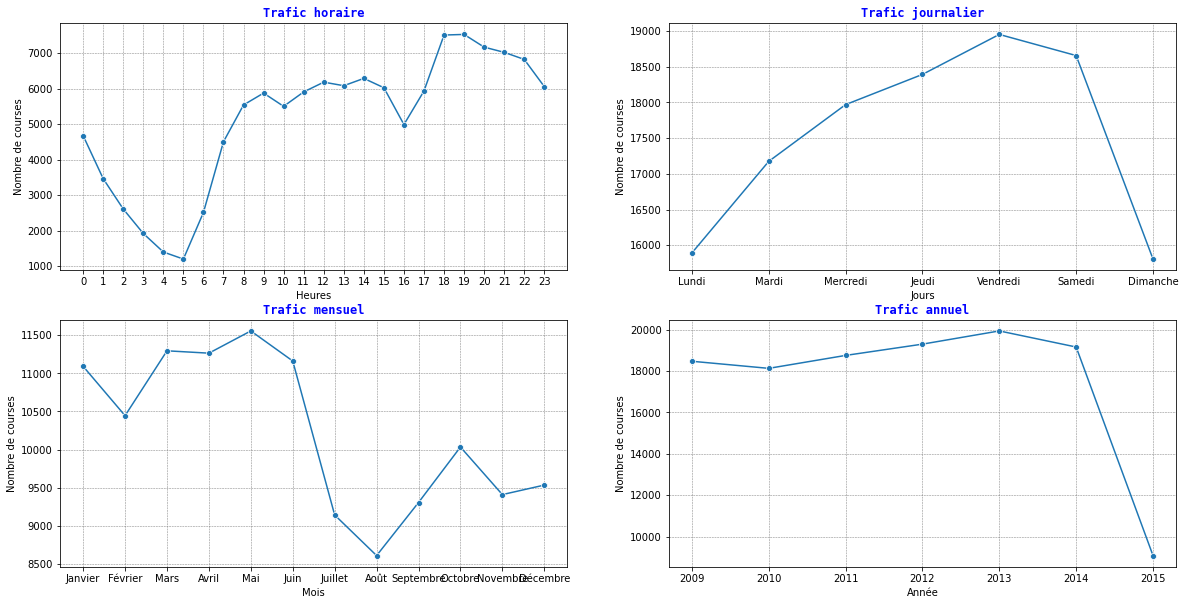

In [240]:
plt.figure(figsize=(20,10))

# Heures
plt.subplot(221)
sns.lineplot(data = heure, x = 'Heure', y = 'Nombre', marker = 'o')
plt.xlabel('Heures')
plt.ylabel('Nombre de courses')
plt.title ("Trafic horaire",
           fontweight = 'bold', family = 'monospace', color = 'b')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

# Jours
plt.subplot(222)
sns.lineplot(data = jour, x = 'Jour', y = 'Nombre', marker = 'o')
plt.xlabel('Jours')
plt.ylabel('Nombre de courses')
plt.title ("Trafic journalier",
           fontweight = 'bold', family = 'monospace', color = 'b')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

# Mois (223 : nrows, ncols, index )
plt.subplot(223)
sns.lineplot(data = mois, x = 'Mois', y = 'Nombre', marker = 'o')
plt.xlabel('Mois')
plt.ylabel('Nombre de courses')
plt.title ("Trafic mensuel",
           fontweight = 'bold', family = 'monospace', color = 'b')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

# Année
plt.subplot(224)
sns.lineplot(data = annee, x = 'Annee', y = 'Nombre', marker = 'o')
plt.xlabel('Année')
plt.ylabel('Nombre de courses')
plt.title ("Trafic annuel",
           fontweight = 'bold', family = 'monospace', color = 'b')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

In [241]:
heureJour = trainDF.groupby(['pickup_jour', 'pickup_heure'])['passenger_count'].agg(['count',
                                                                                     'sum',
                                                                                     'mean']).reset_index()

heureJour['pickup_jour'] = convertJourEnLettre(heureJour['pickup_jour'])

heureJour = heureJour.rename(columns = {'pickup_heure':'Heure', 'pickup_jour':'Jour',
                                        'count':'Nombre', 'sum':'Total', 'mean':'Moyenne'})
# Nous convertissons les heures en chaîne
heureJour['Heure'] = convertirEnChaine(heureJour['Heure'])

heureJour.head()


,Jour,Heure,Nombre,Total,Moyenne
0,Lundi,0,380,617.0,1.623684
1,Lundi,1,235,382.0,1.625532
2,Lundi,2,139,232.0,1.669065
3,Lundi,3,97,167.0,1.721649
4,Lundi,4,98,155.0,1.581633


In [242]:
moisAnnee = trainDF.groupby(['pickup_annee', 'pickup_mois'])['passenger_count'].agg(['count',
                                                                                     'sum',
                                                                                     'mean']).reset_index()

moisAnnee['pickup_mois'] = convertMoisEnLettre(moisAnnee['pickup_mois'])

moisAnnee = moisAnnee.rename(columns = {'pickup_mois':'Mois', 'pickup_annee':'Annee',
                                        'count':'Nombre', 'sum':'Total', 'mean':'Moyenne'})

moisAnnee['Annee'] = convertirEnChaine(moisAnnee['Annee'])

moisAnnee.head()

,Annee,Mois,Nombre,Total,Moyenne
0,2009,Janvier,1552,2564.0,1.652062
1,2009,Février,1488,2536.0,1.704301
2,2009,Mars,1539,2626.0,1.706303
3,2009,Avril,1499,2528.0,1.686458
4,2009,Mai,1544,2661.0,1.723446


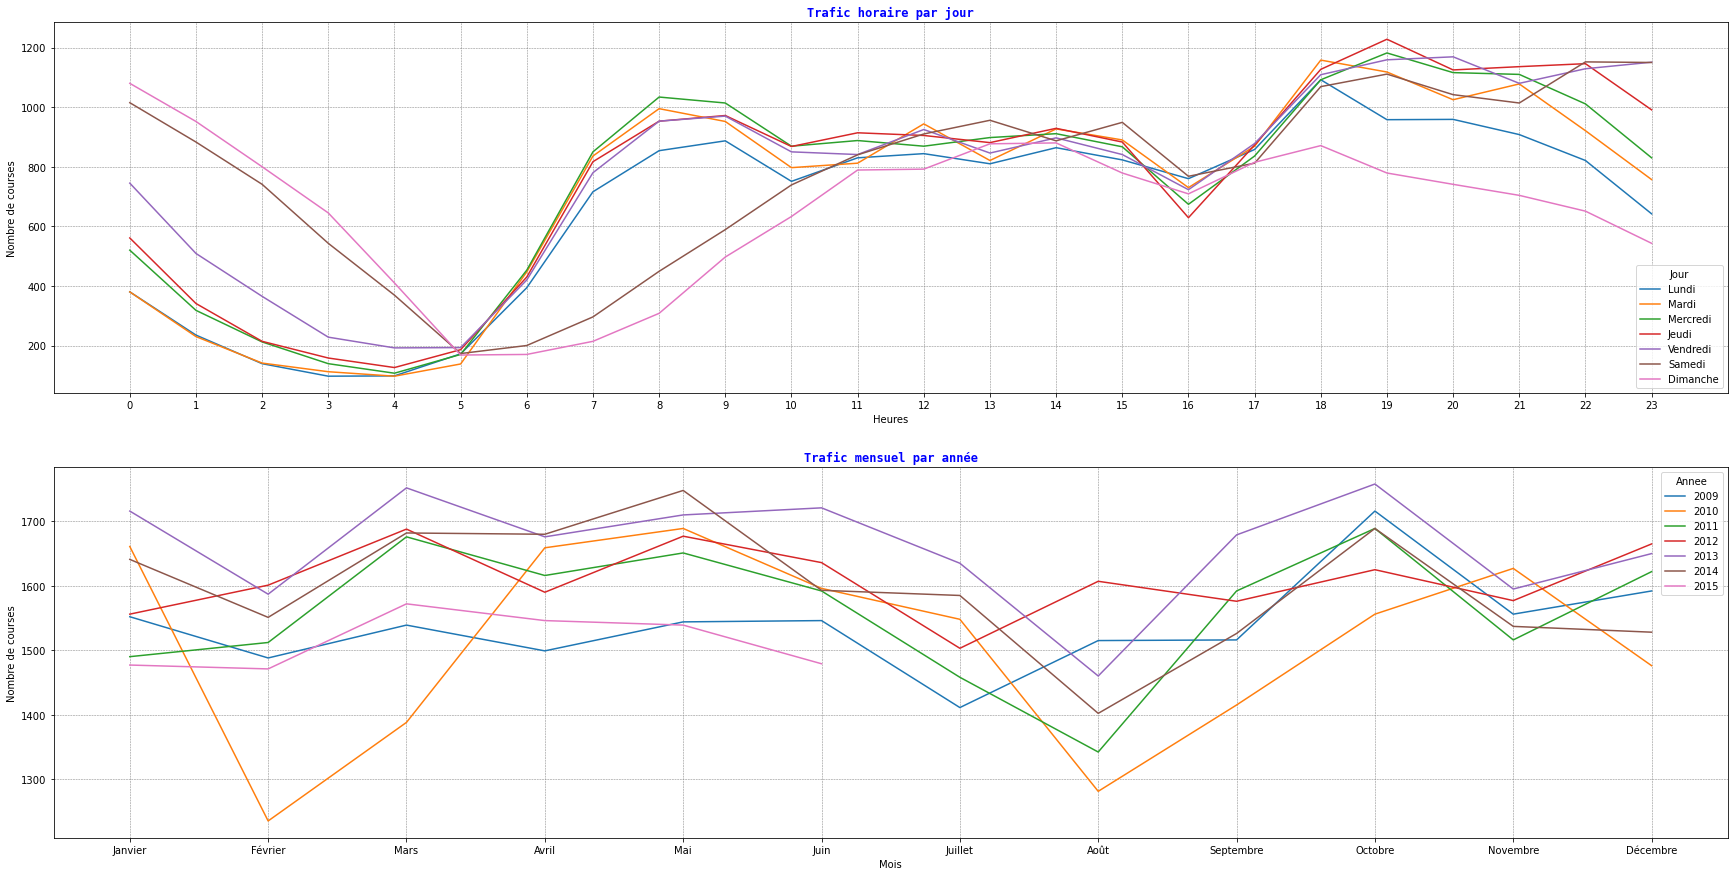

In [243]:
plt.figure(figsize=(30,15))

# Heures
plt.subplot(211)
sns.lineplot(data = heureJour, x = 'Heure', y = 'Nombre', hue = 'Jour')
plt.xlabel('Heures')
plt.ylabel('Nombre de courses')
plt.title ("Trafic horaire par jour",
           fontweight = 'bold', family = 'monospace', color = 'b')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.subplot(212)
sns.lineplot(data = moisAnnee, x = 'Mois', y = 'Nombre', hue = 'Annee')
plt.xlabel('Mois')
plt.ylabel('Nombre de courses')
plt.title ("Trafic mensuel par année",
           fontweight = 'bold', family = 'monospace', color = 'b')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

In [244]:
# Distance 
heureJour = trainDF.groupby(['pickup_jour', 'pickup_heure'])['distance'].agg(['count',
                                                                              'sum',
                                                                              'mean']).reset_index()

heureJour['pickup_jour'] = convertJourEnLettre(heureJour['pickup_jour'])

heureJour = heureJour.rename(columns = {'pickup_heure':'Heure', 'pickup_jour':'Jour',
                                        'count':'Nombre', 'sum':'Total', 'mean':'Moyenne'})
# Nous convertissons les heures en chaîne
heureJour['Heure'] = convertirEnChaine(heureJour['Heure'])

heureJour.head()

,Jour,Heure,Nombre,Total,Moyenne
0,Lundi,0,380,997.662121,2.625427
1,Lundi,1,235,570.500568,2.427662
2,Lundi,2,139,355.600379,2.558276
3,Lundi,3,97,244.400189,2.519590
4,Lundi,4,98,310.914205,3.172594


In [245]:
moisAnnee = trainDF.groupby(['pickup_annee', 'pickup_mois'])['distance'].agg(['count',
                                                                              'sum',
                                                                              'mean']).reset_index()
moisAnnee['pickup_mois'] = convertMoisEnLettre(moisAnnee['pickup_mois'])
moisAnnee = moisAnnee.rename(columns = {'pickup_mois':'Mois', 'pickup_annee':'Annee',
                                        'count':'Nombre', 'sum':'Total', 'mean':'Moyenne'})

moisAnnee['Annee'] = convertirEnChaine(moisAnnee['Annee'])

moisAnnee.head()

,Annee,Mois,Nombre,Total,Moyenne
0,2009,Janvier,1552,3000.801326,1.933506
1,2009,Février,1488,2956.654735,1.986999
2,2009,Mars,1539,3087.901515,2.006434
3,2009,Avril,1499,3049.663068,2.034465
4,2009,Mai,1544,3249.703788,2.104730


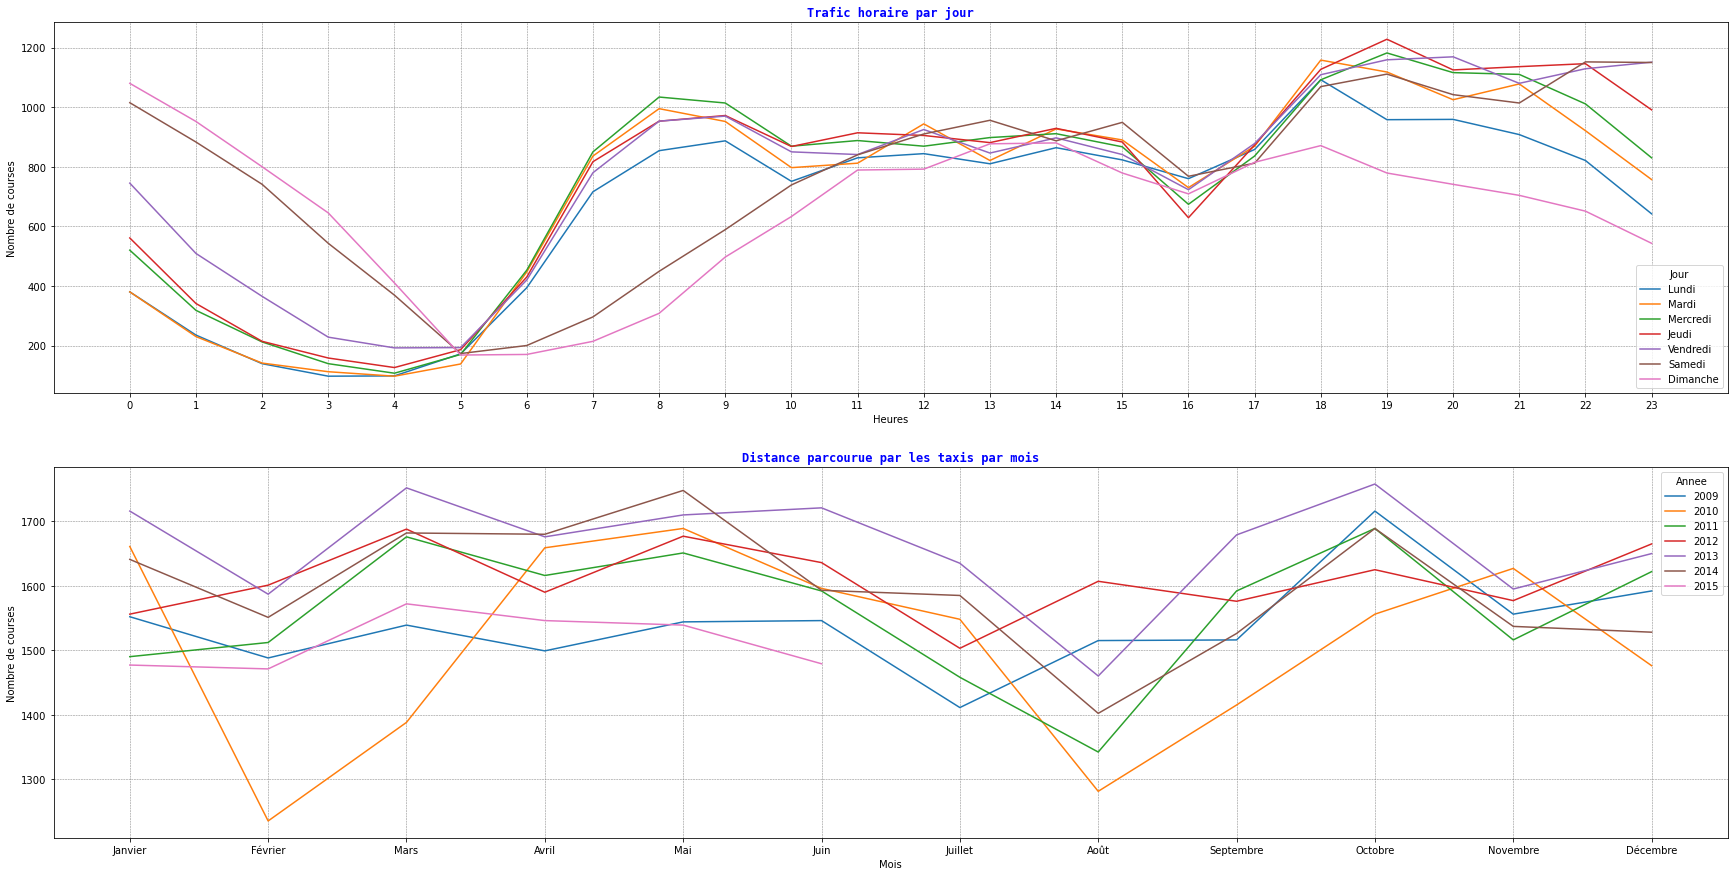

In [246]:
plt.figure(figsize=(30,15))

# Heures
plt.subplot(211)
sns.lineplot(data = heureJour, x = 'Heure', y = 'Nombre', hue = 'Jour')
plt.xlabel('Heures')
plt.ylabel('Nombre de courses')
plt.title ("Trafic horaire par jour",
           fontweight = 'bold', family = 'monospace', color = 'b')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.subplot(212)
sns.lineplot(data = moisAnnee, x = 'Mois', y = 'Nombre', hue = 'Annee')
plt.xlabel('Mois')
plt.ylabel('Nombre de courses')
plt.title ("Distance parcourue par les taxis par mois",
           fontweight = 'bold', family = 'monospace', color = 'b')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

In [247]:
weekEnd = trainDF.groupby(['pickup_weekEnd'])['fare_amount'].agg(['sum',
                                                                  'mean']).reset_index()
weekEnd = weekEnd.rename(columns = {'pickup_weekEnd':'Week-end', 'sum':'Total', 'mean':'Moyenne'})
# 
weekEnd['Week-end'] = np.where(weekEnd['Week-end'] == 1, 'Week-end', 'Jours de semaine')
weekEnd.head()

,Week-end,Total,Moyenne
0,Jours de semaine,1.046673e+06,11.842469
1,Week-end,4.051696e+05,11.756312


In [248]:
aeroport = trainDF.groupby(['courseAeroport'])['fare_amount'].agg(['sum',
                                                                   'mean']).reset_index()
aeroport = aeroport.rename(columns = {'courseAeroport':'Aeroport', 'sum':'Total', 'mean':'Moyenne'})
# 
aeroport['Aeroport'] = np.where(aeroport['Aeroport'] == 1, 'Oui', 'Non')
aeroport.head()

,Aeroport,Total,Moyenne
0,Non,1.209262e+06,10.386794
1,Oui,2.425808e+05,37.761650


In [249]:
heurePointeNuit = trainDF.groupby(['heureDeNuitEtDePointe'])['fare_amount'].agg(['sum',
                                                                                 'mean']).reset_index()
heurePointeNuit = heurePointeNuit.rename(columns = {'heureDeNuitEtDePointe':'heureNuitPointe', 'sum':'Total', 'mean':'Moyenne'})
# 
heurePointeNuit['heureNuitPointe'] = np.where(heurePointeNuit['heureNuitPointe'] == 2, 'Heure de pointe',
                                     np.where(heurePointeNuit['heureNuitPointe'] == 1, 'Heure de nuit', 'Heure normale'))
heurePointeNuit.head()

,heureNuitPointe,Total,Moyenne
0,Heure normale,612125.12500,11.780246
1,Heure de nuit,535121.06250,11.918595
2,Heure de pointe,304596.34375,11.721104


In [250]:
# https://www.partir.com/Etats-unis/new-york/quand-partir.html
# Les types de saisons 
saison = trainDF.groupby(['pickup_saison'])['fare_amount'].agg(['count',
                                                                'sum',
                                                                'mean']).reset_index()
saison = saison.rename(columns = {'pickup_saison':'Saison', 'count':'Nombre', 'sum':'Total', 
                                  'mean':'Moyenne'})
# 
saison['Saison'] = np.where(saison['Saison'] == 1, 'Hiver',
                   np.where(saison['Saison'] == 2, 'Printemps',
                   np.where(saison['Saison'] == 3, 'Eté', 'Automne')))
saison.head()

,Saison,Nombre,Total,Moyenne
0,Hiver,31207,355400.15625,11.388475
1,Printemps,34752,414163.34375,11.917684
2,Eté,27883,329873.93750,11.830647
3,Automne,29005,352405.06250,12.149804


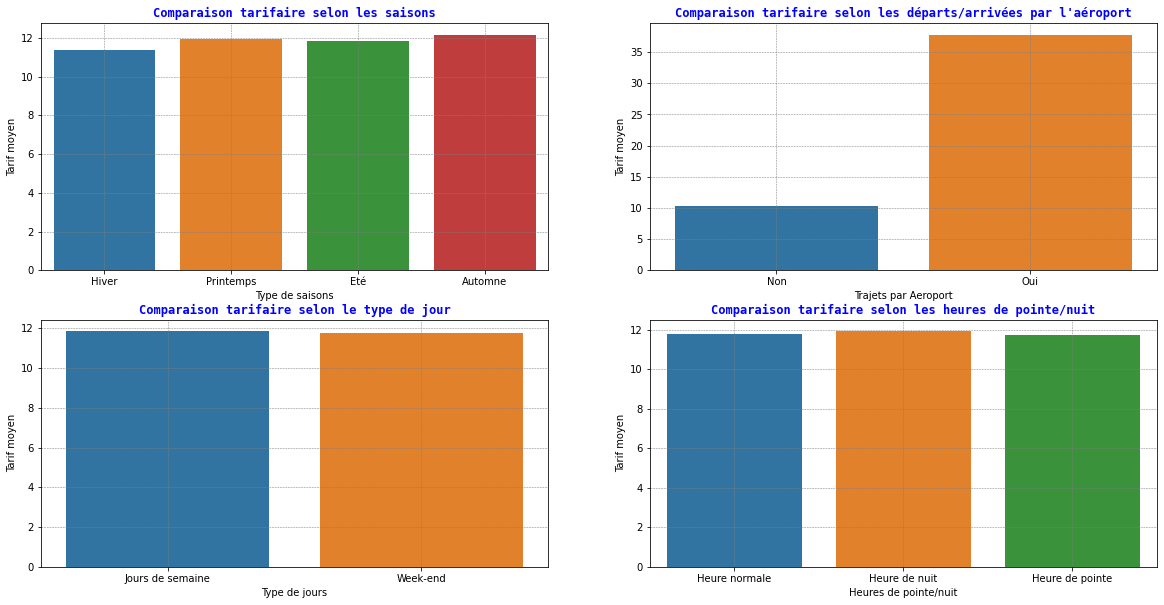

In [251]:
plt.figure(figsize=(20,10))

# Aeroport
plt.subplot(221)
sns.barplot(data = saison, x = 'Saison', y = 'Moyenne')
plt.xlabel('Type de saisons')
plt.ylabel('Tarif moyen')
plt.title ("Comparaison tarifaire selon les saisons",
           fontweight = 'bold', family = 'monospace', color = 'b')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

# Aeroport
plt.subplot(222)
sns.barplot(data = aeroport, x = 'Aeroport', y = 'Moyenne')
plt.xlabel('Trajets par Aeroport')
plt.ylabel('Tarif moyen')
plt.title ("Comparaison tarifaire selon les départs/arrivées par l'aéroport",
           fontweight = 'bold', family = 'monospace', color = 'b')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

# Heures de pointe et nuit
plt.subplot(223)
sns.barplot(data = weekEnd, x = 'Week-end', y = 'Moyenne')
plt.xlabel('Type de jours')
plt.ylabel('Tarif moyen')
plt.title ("Comparaison tarifaire selon le type de jour",
           fontweight = 'bold', family = 'monospace', color = 'b')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

# Heures de pointe et nuit 
plt.subplot(224)
sns.barplot(data = heurePointeNuit, x = 'heureNuitPointe', y = 'Moyenne')
plt.xlabel('Heures de pointe/nuit')
plt.ylabel('Tarif moyen')
plt.title ("Comparaison tarifaire selon les heures de pointe/nuit",
           fontweight = 'bold', family = 'monospace', color = 'b')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

Text(3.674999999999997, 0.5, 'Tarifs')

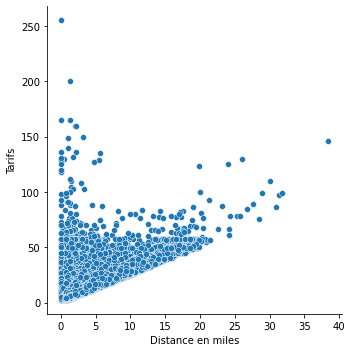

In [252]:
# Relation salaire et distance 
df = trainDF.copy()
df.drop(df[df['courseAeroport'] == 1].index, inplace=True)
df.drop(df[(df['pickup_latitude'] == df['dropoff_latitude']) & (df['pickup_longitude'] == df['dropoff_longitude'])].index, inplace=True)
sns.relplot(x = 'distance', y = 'fare_amount', data = df, kind = 'scatter')
plt.xlabel('Distance en miles')
plt.ylabel('Tarifs')

In [253]:
# Nous pensons que pour les trajets autour de 1 miles qui ont un tarif élevé (avoisinant les 100 €), 
# il s'agit en fait d'un aller-retour.  
# Malheureusement, nous n'avons pas de variable indiquant la durée du trajet pour valider notre hyopothèse.
# Néanmoins, nous gardons ces observations car elles peuvent être intéressantes dans notre étude.

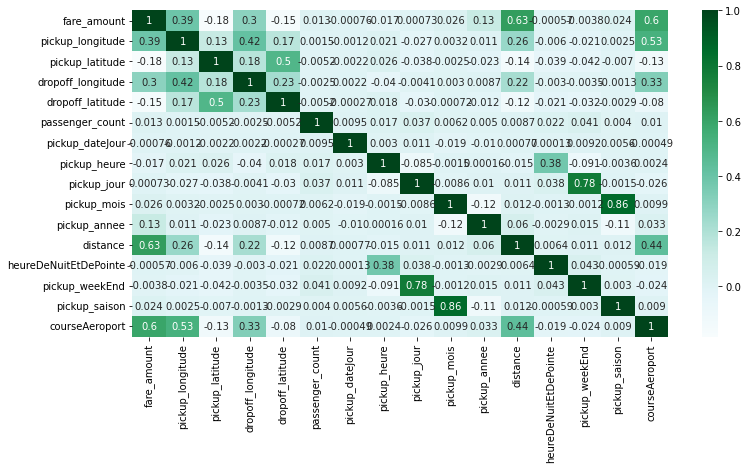

In [254]:
# Corrélation 
plt.figure(figsize = (12,6))
sns.heatmap(trainDF.drop(['key', 'pickup_datetime'], axis = 1).corr(), 
           cmap ='BuGn', annot = True);

In [255]:
aeroport = trainDF.groupby(['courseAeroport'])['key'].agg(['count']).reset_index()
aeroport = aeroport.rename(columns = {'courseAeroport':'Aeroport', 'count':'Nombre'})
# 
aeroport['Aeroport'] = np.where(aeroport['Aeroport'] == 1, 'Oui', 'Non')
aeroport.head()

,Aeroport,Nombre
0,Non,116423
1,Oui,6424


Text(0.5, 1.0, "Représentativité des courses vers l'aéroport")

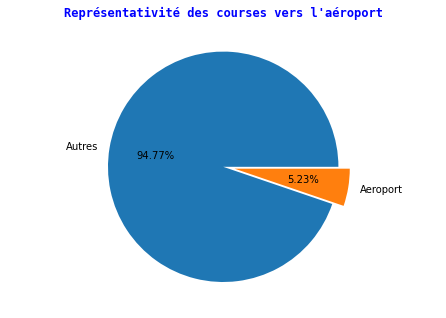

In [256]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
explode = [0, 0.1]
label = ['Autres', 'Aeroport']
ax.pie(aeroport['Nombre'], labels = label, explode = explode, autopct='%1.2f%%')
plt.title("Représentativité des courses vers l'aéroport",
         fontweight = 'bold', family = 'monospace', color = 'b')

In [257]:
aeroport = trainDF.groupby(['pickup_jour', 'courseAeroport'])['key'].agg(['count']).reset_index()
aeroport = aeroport.rename(columns = {'pickup_jour':'Jours', 'courseAeroport':'Aeroport', 'count':'Nombre'})
# 
aeroport['Jours'] = convertJourEnLettre(aeroport['Jours'])
aeroport['Aeroport'] = np.where(aeroport['Aeroport'] == 1, 'Oui', 'Non')
aeroport.head()

,Jours,Aeroport,Nombre
0,Lundi,Non,14823
1,Lundi,Oui,1069
2,Mardi,Non,16209
3,Mardi,Oui,966
4,Mercredi,Non,17058


In [258]:
saisons = trainDF.groupby(['pickup_saison', 'courseAeroport'])['key'].agg(['count']).reset_index()
saisons = saisons.rename(columns = {'pickup_saison':'Saison', 'courseAeroport':'Aeroport', 'count':'Nombre'})
# 
saisons['Saison'] = np.where(saisons['Saison'] == 1, 'Hiver',
                   np.where(saisons['Saison'] == 2, 'Printemps',
                   np.where(saisons['Saison'] == 3, 'Eté', 'Automne')))
saisons['Aeroport'] = np.where(saisons['Aeroport'] == 1, 'Oui', 'Non')
saisons.head()

,Saison,Aeroport,Nombre
0,Hiver,Non,29701
1,Hiver,Oui,1506
2,Printemps,Non,32899
3,Printemps,Oui,1853
4,Eté,Non,26391


Text(0.5, 1.0, "Représentativité des courses vers l'aéroport")

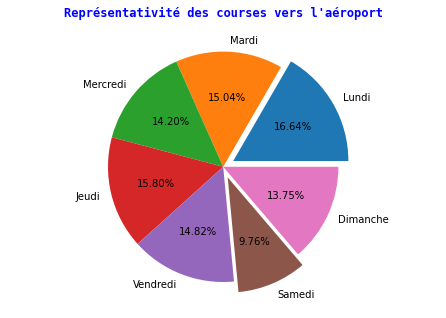

In [259]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
aeroport = aeroport[aeroport['Aeroport'] == 'Oui']
explode = [0.1, 0, 0, 0, 0, 0.1, 0]
ax.pie(aeroport['Nombre'], labels = aeroport['Jours'], explode = explode, autopct='%1.2f%%')
plt.title("Représentativité des courses vers l'aéroport",
         fontweight = 'bold', family = 'monospace', color = 'b')

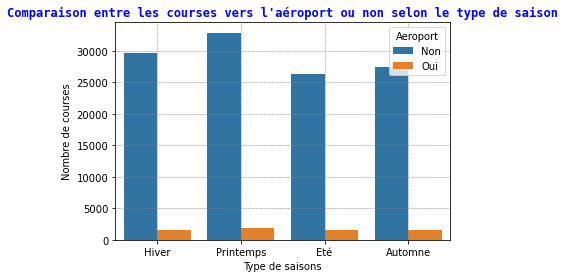

In [260]:
sns.barplot(data = saisons, x = 'Saison', y = 'Nombre', hue = 'Aeroport')
plt.xlabel('Type de saisons')
plt.ylabel('Nombre de courses')
plt.title ("Comparaison entre les courses vers l'aéroport ou non selon le type de saison",
           fontweight = 'bold', family = 'monospace', color = 'b')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

Text(0.5, 1.0, "Représentativité des courses vers l'aéroport selon les saisons")

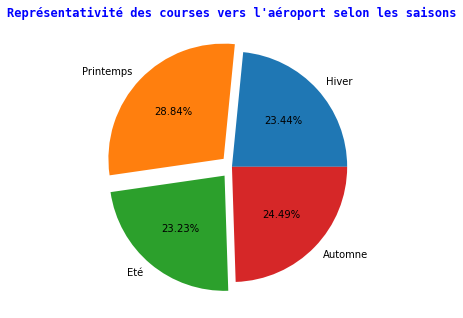

In [261]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
saisons = saisons[saisons['Aeroport'] == 'Oui']
explode = [0, 0.1, 0.1, 0]
ax.pie(saisons['Nombre'], labels = saisons['Saison'], explode = explode, autopct='%1.2f%%')
plt.title("Représentativité des courses vers l'aéroport selon les saisons",
         fontweight = 'bold', family = 'monospace', color = 'b')

# Modeling

In [262]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor

In [267]:
cible = trainDF.fare_amount

In [268]:
#création de base varaible sans target
trainDF.drop(columns = ['fare_amount'], inplace = True)

In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainDF,
                                                    cible,
                                                    stratify = cible,
                                                    test_size = 0.2,
                                                    random_state = 0)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [275]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
np.mean(cross_val_score(lr, X_train, y_train, cv=5))

NameError: name 'X_train' is not defined